In [1]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
plt.style.use('seaborn-whitegrid')

In [3]:
server = 'DESKTOP-LORG5OV'
database = 'Agence_Urbaine'
username = ''
password = ''
driver = '{SQL Server}' 
cnxn = pyodbc.connect(f"DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}")

In [4]:
budget_inv = pd.read_sql('select ANNEE,sum(ENGAGEMENTS) as INVESTISSEMENT from Budget_Investissement group by ANNEE',cnxn)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [5]:
budget_inv

,ANNEE,INVESTISSEMENT
0,2017-12-31,1927951.60
1,2018-12-31,2512974.96
2,2019-12-31,3358883.60
3,2020-12-31,2468179.00
4,2021-12-31,746343.60
5,2022-12-31,2913370.00


 #Analysis Le Performance de l'Inverstissement 

In [6]:
# TCAM  =  (Valeur Finale/Valeur Intiale)^(1/Nbr Annee)-1

In [7]:
budget_inv.tail(1)['INVESTISSEMENT']

5    2913370.0
Name: INVESTISSEMENT, dtype: float64

In [8]:
budget_inv.head(1)['INVESTISSEMENT']

0    1927951.6
Name: INVESTISSEMENT, dtype: float64

In [9]:
TCAM_Global = (pow((2913370.0/1927951.60),(1/5))-1)*100

In [10]:
TCAM_Global

8.607521614860136

In [11]:
#Commenter : 
'''
Le TCAM global sur la période de 2017 à 2022 est de 8,60%, 
ce qui indique que l'investissement a enregistré une croissance
moyenne annuelle de 8,60% au cours de cette période.
'''

"\nLe TCAM global sur la période de 2017 à 2022 est de 8,60%, \nce qui indique que l'investissement a enregistré une croissance\nmoyenne annuelle de 8,60% au cours de cette période.\n"

In [12]:
TCAM_2019_2021 = (pow((746343.60/3358883.60),(1/2))-1)*100

In [13]:
TCAM_2019_2021

-52.86191561056175

In [14]:
#Commenter : 
''' 
Le TCAM pour la période de 2019 à 2021 est de -52.86%, 
ce qui indique que l'investissement a enregistré
une baisse moyenne annuelle de 52.86%% au cours de cette période.
'''

" \nLe TCAM pour la période de 2019 à 2021 est de -52.86%, \nce qui indique que l'investissement a enregistré\nune baisse moyenne annuelle de 52.86%% au cours de cette période.\n"

----------Analyse des Séries Chronologique : 

In [15]:
budget_inv

,ANNEE,INVESTISSEMENT
0,2017-12-31,1927951.60
1,2018-12-31,2512974.96
2,2019-12-31,3358883.60
3,2020-12-31,2468179.00
4,2021-12-31,746343.60
5,2022-12-31,2913370.00


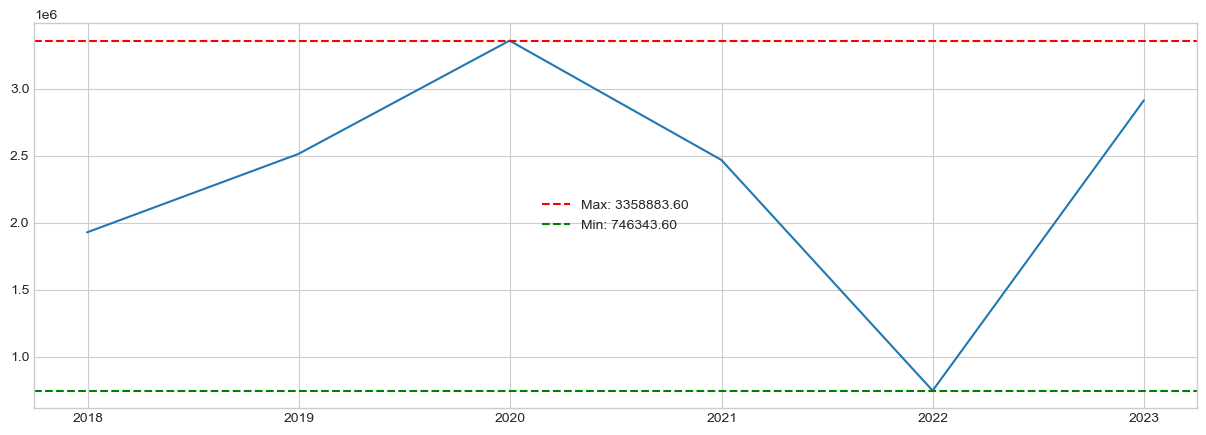

In [16]:
plt.figure(figsize=(15,5))
plt.plot(budget_inv['ANNEE'],budget_inv['INVESTISSEMENT'])
max_inv = budget_inv['INVESTISSEMENT'].max()
min_inv = budget_inv['INVESTISSEMENT'].min()
plt.axhline(max_inv, color='red', linestyle='--', label=f'Max: {max_inv:.2f}')
plt.axhline(min_inv, color='green', linestyle='--', label=f'Min: {min_inv:.2f}')
plt.legend()
plt.show()

In [17]:
budget_inv.dtypes

ANNEE             datetime64[ns]
INVESTISSEMENT           float64
dtype: object

In [18]:
budget_inv.set_index('ANNEE',inplace=True)

In [19]:
budget_inv

,INVESTISSEMENT
ANNEE,
2017-12-31,1927951.60
2018-12-31,2512974.96
2019-12-31,3358883.60
2020-12-31,2468179.00
2021-12-31,746343.60
2022-12-31,2913370.00


In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

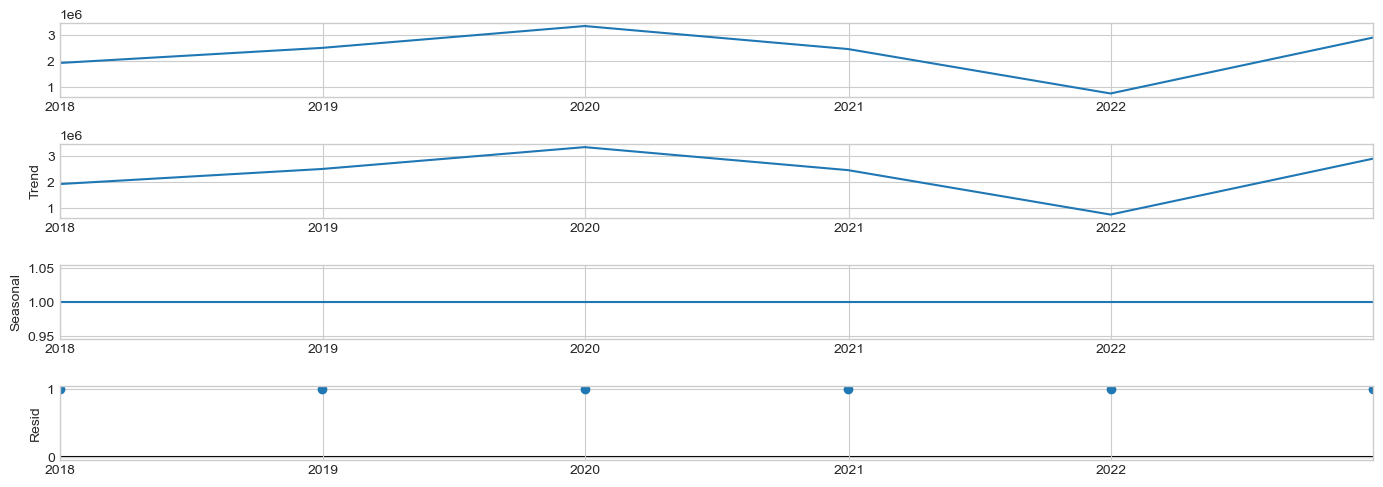

In [21]:
#Modele Additive : 
Decomposition = seasonal_decompose(budget_inv,model='multiplicative')
fig = Decomposition.plot()
fig.set_size_inches(15, 5)
plt.show()

#Resultat : 

In [22]:
''' 
     Graphique 1 (Trend): la décomposition de série chronologique ressemble au graphique des données brutes, 
                    cela peut indiquer qu'il n'y a pas de tendance claire dans vos données. En d'autres termes,
                    les valeurs de votre série chronologique semblent être distribuées de manière aléatoire autour d'une moyenne constante,
                    sans qu'il y ait une tendance nette à la hausse ou à la baisse au fil du temps. (+) ou que la période d'observation soit trop courte.

        'Hypothese  ' : Si la série chronologique semble être distribuée de manière aléatoire autour d'une moyenne constante,
                        cela peut indiquer que votre série ne présente pas de tendance ou de saisonnalité significative. 
                        Cela peut également signifier qu'il y a une variation aléatoire importante dans votre série chronologique.

     Graphique 2 (Seasonal): De même, si la composante saisonnière est constante, cela signifie qu'il n'y a pas de variation saisonnière régulière dans vos données. 
                             Cela peut être dû au fait que les fluctuations saisonnières sont faibles ou inexistantes dans votre série chronologique.

     Chraphique 3 (Resid): Le graphique des résidus montre une variation aléatoire importante, 
                           ce qui suggère qu'il y a une grande incertitude ou des facteurs imprévus qui influencent votre série chronologique.
'''

# Donc il exists des facteurs qui influencent sur l'investissement

" \n     Graphique 1 (Trend): la décomposition de série chronologique ressemble au graphique des données brutes, \n                    cela peut indiquer qu'il n'y a pas de tendance claire dans vos données. En d'autres termes,\n                    les valeurs de votre série chronologique semblent être distribuées de manière aléatoire autour d'une moyenne constante,\n                    sans qu'il y ait une tendance nette à la hausse ou à la baisse au fil du temps. (+) ou que la période d'observation soit trop courte.\n\n        'Hypothese  ' : Si la série chronologique semble être distribuée de manière aléatoire autour d'une moyenne constante,\n                        cela peut indiquer que votre série ne présente pas de tendance ou de saisonnalité significative. \n                        Cela peut également signifier qu'il y a une variation aléatoire importante dans votre série chronologique.\n\n     Graphique 2 (Seasonal): De même, si la composante saisonnière est constante, cela sig

-------Analyse de Regression Linéaire : 

Hypothese 1 : "Budget Exploitation impact sur l'investissement"

In [23]:
budget_ex  = pd.read_sql('select ANNEE,sum(ENGAGEMENT) as EXPLOITATION from Budget_Exploitation group by ANNEE',cnxn)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [24]:
budget_ex

,ANNEE,EXPLOITATION
0,2017-12-31,3538705.94
1,2018-12-31,6045873.74
2,2019-12-31,13113565.79
3,2020-12-31,13773629.99
4,2021-12-31,16452351.65
5,2022-12-31,16559813.04


In [25]:
budget_inv

,INVESTISSEMENT
ANNEE,
2017-12-31,1927951.60
2018-12-31,2512974.96
2019-12-31,3358883.60
2020-12-31,2468179.00
2021-12-31,746343.60
2022-12-31,2913370.00


In [26]:
budget_inv_exploi = pd.merge(budget_ex,budget_inv,on='ANNEE')

In [27]:
budget_inv_exploi

,ANNEE,EXPLOITATION,INVESTISSEMENT
0,2017-12-31,3538705.94,1927951.60
1,2018-12-31,6045873.74,2512974.96
2,2019-12-31,13113565.79,3358883.60
3,2020-12-31,13773629.99,2468179.00
4,2021-12-31,16452351.65,746343.60
5,2022-12-31,16559813.04,2913370.00


In [28]:
budget_inv_exploi.describe()

,EXPLOITATION,INVESTISSEMENT
count,6.000000e+00,6.000000e+00
mean,1.158066e+07,2.321284e+06
std,5.495292e+06,9.078161e+05
min,3.538706e+06,7.463436e+05
25%,7.812797e+06,2.063008e+06
50%,1.344360e+07,2.490577e+06
75%,1.578267e+07,2.813271e+06
max,1.655981e+07,3.358884e+06


In [29]:
# Sélectionner les variables d'intérêt pour l'analyse de régression
X = budget_inv_exploi['EXPLOITATION']
y = budget_inv_exploi['INVESTISSEMENT']

In [30]:
# Ajouter une constante à X pour inclure l'ordonnée à l'origine dans le modèle de régression
X = sm.add_constant(X)

In [31]:
# Ajuster un modèle de régression linéaire aux données
model = sm.OLS(y, X).fit()

In [32]:
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         INVESTISSEMENT   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.249
Method:                 Least Squares   F-statistic:                  0.003240
Date:                Sat, 27 May 2023   Prob (F-statistic):              0.957
Time:                        15:39:00   Log-Likelihood:                -90.277
No. Observations:                   6   AIC:                             184.6
Df Residuals:                       4   BIC:                             184.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.376e+06   1.04e+06      2.280      0.085   -5.17e+05    5.27e+06
EXPLOITATION    -0.0047      0.083     -0.057      0.957      -0.234       0.225
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.316
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.564
Skew:                          -0.714   Prob(JB):                        0.754
Kurtosis:                       2.539   Cond. No.                     3.18e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#EQUATION : 
INVES = 2.376e+06-0.0047*budget_inv_exploi['EXPLOITATION']

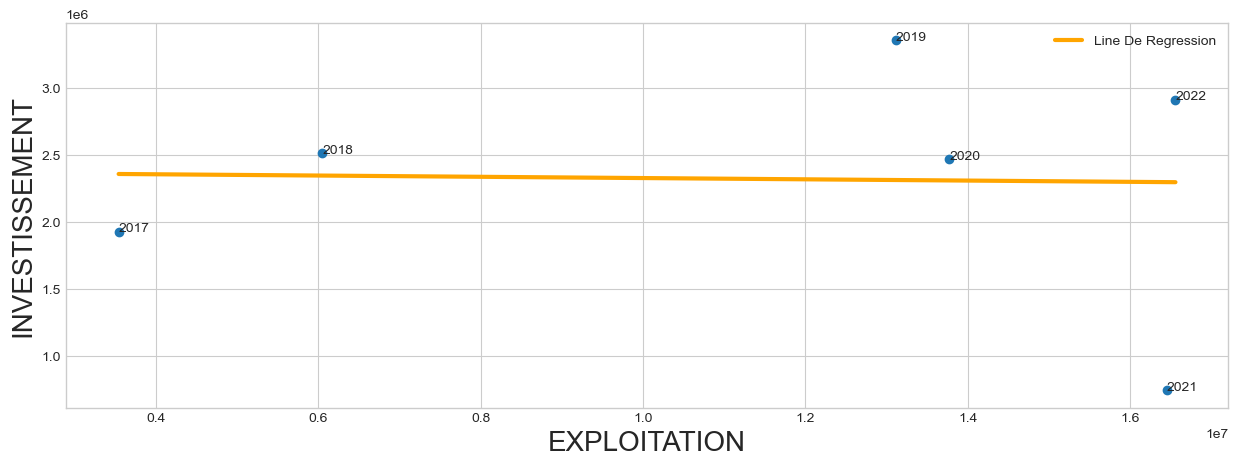

In [34]:
labels = ['2017','2018','2019','2020','2021','2022']
plt.figure(figsize=(15,5))
plt.scatter(budget_inv_exploi['EXPLOITATION'],budget_inv_exploi['INVESTISSEMENT'])
for i, label in enumerate(labels):
    plt.annotate(label, (budget_inv_exploi.iloc[i]['EXPLOITATION'], budget_inv_exploi.iloc[i]['INVESTISSEMENT']),fontsize=10)

fig = plt.plot(budget_inv_exploi['EXPLOITATION'],INVES,lw=3,c='orange',label='Line De Regression')
plt.legend()
plt.xlabel('EXPLOITATION',fontsize=20)
plt.ylabel('INVESTISSEMENT',fontsize=20)
plt.show()

In [35]:
''' 
Resumer : 
    - On remarque que la line de la regression est constant c'est a dire tout ce qui a changé au niveau de budget d'exploitation, l'investissement sera etre constant
    - Et puis que (P>|t|)=0.957 >>> 0.05 donc la variable "EXPLOITATION" n'a pas un effet significatif sur la variable INVESTISSEMENT.
    X - Donc Nous excluons cette hypothèse
'''

' \nResumer : \n    - On remarque que la line de la regression est constant c\'est a dire tout ce qui a changé au niveau de budget d\'exploitation, l\'investissement sera etre constant\n    - Et puis que (P>|t|)=0.957 >>> 0.05 donc la variable "EXPLOITATION" n\'a pas un effet significatif sur la variable INVESTISSEMENT.\n    X - Donc Nous excluons cette hypothèse\n'

Hypothese 2 : "COVID-19 impact sur l'investissement"

In [36]:
inv_et_covid_19 = pd.read_excel('BUDGET_INVESTISSEMENT.xlsx')

In [37]:
inv_et_covid_19

,ANNEE,INVESTISSEMENT
0,2012-12-31,6018915.20
1,2014-12-31,3028316.26
2,2016-12-31,2990576.00
3,2017-12-31,1927951.60
4,2018-12-31,2512974.96
5,2019-12-31,3358883.60
6,2020-12-31,2468179.00
7,2021-12-31,746343.60
8,2022-12-31,2913370.00


In [38]:
# Ajouter une variable binaire pour COVID-19 (1 pour les années après 2019, 0 pour les années avant)
inv_et_covid_19['COVID-19'] = ((inv_et_covid_19['ANNEE'] >= '2020-01-01') & (inv_et_covid_19['ANNEE'] < '2022-01-01')).astype(int)

In [39]:
inv_et_covid_19

,ANNEE,INVESTISSEMENT,COVID-19
0,2012-12-31,6018915.20,0
1,2014-12-31,3028316.26,0
2,2016-12-31,2990576.00,0
3,2017-12-31,1927951.60,0
4,2018-12-31,2512974.96,0
5,2019-12-31,3358883.60,0
6,2020-12-31,2468179.00,1
7,2021-12-31,746343.60,1
8,2022-12-31,2913370.00,0


In [40]:
inv_et_covid_19.describe()

,INVESTISSEMENT,COVID-19
count,9.000000e+00,9.000000
mean,2.885057e+06,0.222222
std,1.408919e+06,0.440959
min,7.463436e+05,0.000000
25%,2.468179e+06,0.000000
50%,2.913370e+06,0.000000
75%,3.028316e+06,0.000000
max,6.018915e+06,1.000000


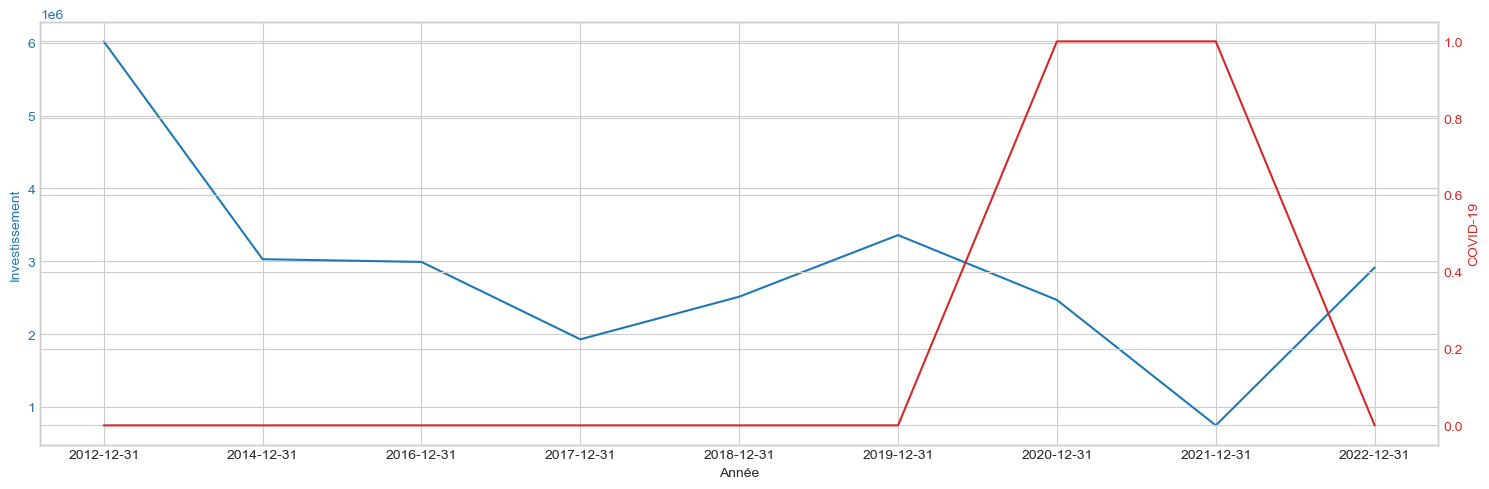

In [41]:
# Créer un graphique linéaire des investissements et du nombre l'état de COVID-19 au fil du temps

fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('Année')
ax1.set_ylabel('Investissement', color=color)
ax1.plot(inv_et_covid_19['ANNEE'].astype(str), inv_et_covid_19['INVESTISSEMENT'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('COVID-19', color=color)
ax2.plot(inv_et_covid_19['ANNEE'].astype(str), inv_et_covid_19['COVID-19'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [136]:
# Sélectionner les variables d'intérêt pour l'analyse de régression
X = inv_et_covid_19['COVID-19']
y = inv_et_covid_19['INVESTISSEMENT']

In [137]:
# Ajouter une constante à X pour inclure l'ordonnée à l'origine dans le modèle de régression
X = sm.add_constant(X)

In [138]:
# Ajuster un modèle de régression linéaire aux données
model = sm.OLS(y, X).fit()

In [139]:
# Afficher les résultats de la régression
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         INVESTISSEMENT   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     2.516
Date:                Sat, 27 May 2023   Prob (F-statistic):              0.157
Time:                        15:48:26   Log-Likelihood:                -138.28
No. Observations:                   9   AIC:                             280.6
Df Residuals:                       7   BIC:                             281.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.25e+06   4.88e+05      6.656      0.000     2.1e+06     4.4e+06
COVID-19   -1.643e+06   1.04e+06     -1.586      0.157   -4.09e+06    8.06e+05
==============================================================================
Omnibus:                        9.070   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                3.396
Skew:                           1.386   Prob(JB):                        0.183
Kurtosis:                       4.171   Cond. No.                         2.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
INVESTISSEMENT = 3.25e+06-1.64e+06*inv_et_covid_19['COVID-19']

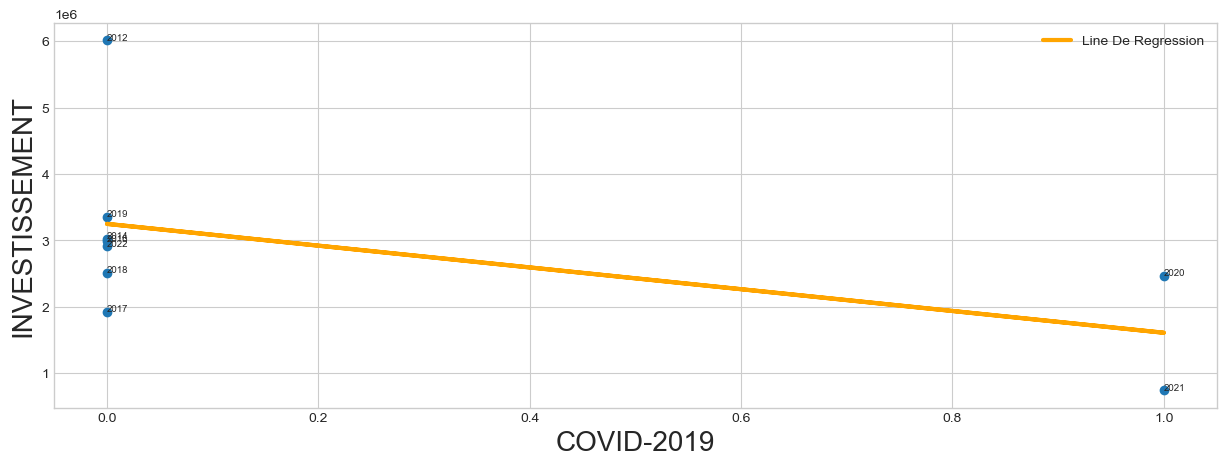

In [47]:
labels = ['2012','2014','2016','2017','2018','2019','2020','2021','2022']
plt.figure(figsize=(15,5))
plt.scatter(inv_et_covid_19['COVID-19'],inv_et_covid_19['INVESTISSEMENT'])
for i, label in enumerate(labels):
    plt.annotate(label, (inv_et_covid_19.iloc[i]['COVID-19'], inv_et_covid_19.iloc[i]['INVESTISSEMENT']),fontsize=7)

fig = plt.plot(inv_et_covid_19['COVID-19'],INVESTISSEMENT,lw=3,c='orange',label='Line De Regression')

plt.legend()
plt.xlabel('COVID-2019',fontsize=20)
plt.ylabel('INVESTISSEMENT',fontsize=20)
plt.show()

In [48]:
#Resulta : 
'''  
    Puis que la probabilité associée à la valeur absolue de la statistique de test t (P > |t|) est superieur au seuil 0,05 
    Donc COVID-19 est pas significatif ,c'est a dire que COVID-19 a un impact significatif sur l'investissement dans ce modèle,
'''

"  \n    Puis que la probabilité associée à la valeur absolue de la statistique de test t (P > |t|) est superieur au seuil 0,05 \n    Donc COVID-19 est pas significatif ,c'est a dire que COVID-19 a un impact significatif sur l'investissement dans ce modèle,\n"

Hypothese 3 : "L'inflation impact sur l'investissement"

In [140]:
infltation = pd.read_excel("Données_Supp/l'inflation_au_maroc.xlsx")

In [142]:
infltation

,ANNEE,le taux d'inflation
0,2012-12-31\t,"1,29 %"
1,2014-12-31\t,"0,44 %"
2,2016-12-31\t,"1,64 %"
3,2017-12-31\t,"0,75 %"
4,2018-12-31\t,"1,80 %"
5,2019-12-31\t,"0,30 %"
6,2020-12-31\t,"0,71 %"
7,2021-12-31\t,"1,40 %"
8,2022-12-31\t,"8,3 %"


In [143]:
infltation.columns  = ['ANNEE','INFLTATION']

In [144]:
infltation['ANNEE'] = infltation['ANNEE'].str.replace('\t','')

In [145]:
infltation['ANNEE'] = pd.to_datetime(infltation['ANNEE'])


In [146]:
infltation['INFLTATION'] = infltation['INFLTATION'].str.replace(' ','')


In [147]:
infltation['INFLTATION'] = infltation['INFLTATION'].str.replace('%','')

In [148]:
infltation['INFLTATION'] = infltation['INFLTATION'].str.replace(',','.')

In [149]:
infltation['INFLTATION'] = infltation['INFLTATION'].astype(float)

In [150]:
inv_infltation = pd.merge(budget_inv,infltation,on="ANNEE")

In [151]:
inv_infltation

,ANNEE,INVESTISSEMENT,INFLTATION
0,2017-12-31,1927951.60,0.75
1,2018-12-31,2512974.96,1.80
2,2019-12-31,3358883.60,0.30
3,2020-12-31,2468179.00,0.71
4,2021-12-31,746343.60,1.40
5,2022-12-31,2913370.00,8.30


In [152]:
inv_infltation.describe()

,INVESTISSEMENT,INFLTATION
count,6.000000e+00,6.000000
mean,2.321284e+06,2.210000
std,9.078161e+05,3.031237
min,7.463436e+05,0.300000
25%,2.063008e+06,0.720000
50%,2.490577e+06,1.075000
75%,2.813271e+06,1.700000
max,3.358884e+06,8.300000


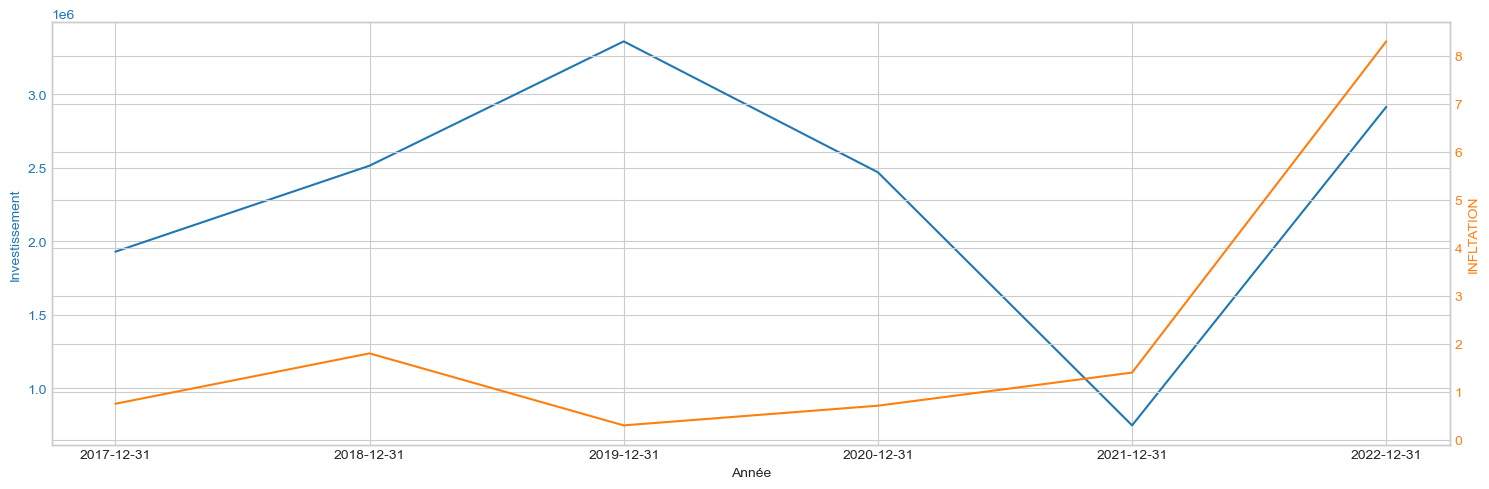

In [153]:
# Créer un graphique linéaire des investissements et le taux d'infltation : 

fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('Année')
ax1.set_ylabel('Investissement', color=color)
ax1.plot(inv_infltation['ANNEE'].astype(str), inv_infltation['INVESTISSEMENT'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('INFLTATION', color=color)
ax2.plot(inv_infltation['ANNEE'].astype(str), inv_infltation['INFLTATION'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [158]:
X = inv_infltation['INFLTATION']
y = inv_infltation['INVESTISSEMENT']

In [159]:
X = sm.add_constant(X)

In [160]:
model = sm.OLS(y, X).fit()

In [161]:
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         INVESTISSEMENT   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                 -0.183
Method:                 Least Squares   F-statistic:                    0.2250
Date:                Sat, 27 May 2023   Prob (F-statistic):              0.660
Time:                        16:05:07   Log-Likelihood:                -90.115
No. Observations:                   6   AIC:                             184.2
Df Residuals:                       4   BIC:                             183.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.169e+06   5.16e+05      4.203      0.014    7.36e+05     3.6e+06
INFLTATION  6.911e+04   1.46e+05      0.474      0.660   -3.35e+05    4.74e+05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.050
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.370
Skew:                          -0.603   Prob(JB):                        0.831
Kurtosis:                       2.842   Cond. No.                         4.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#EQUATION : 
INVESTISSEMENT =  2.169e+06	 + 6.911e+04*inv_infltation['INFLTATION'] 

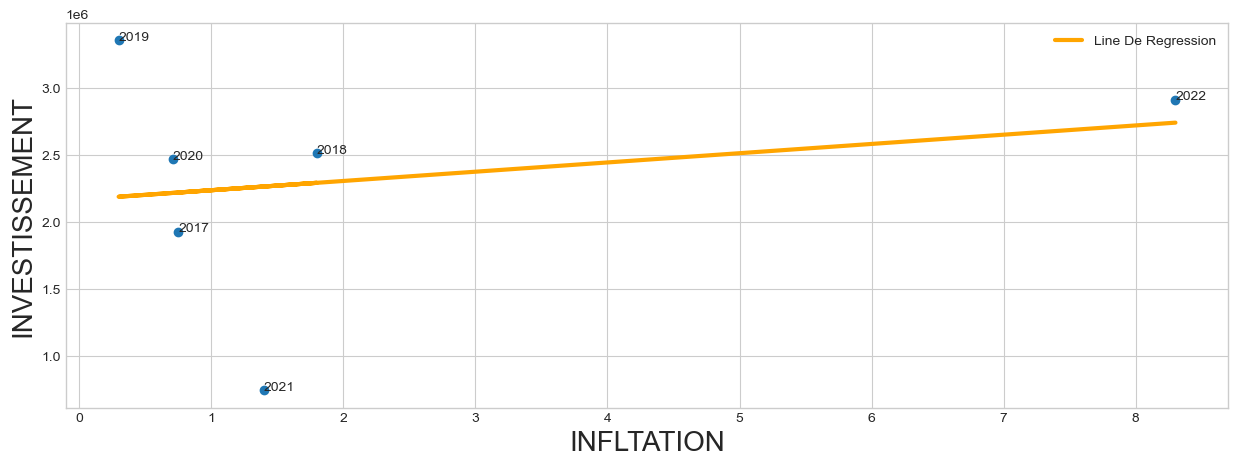

In [68]:
labels = ['2017','2018','2019','2020','2021','2022']
plt.figure(figsize=(15,5))
plt.scatter(inv_infltation['INFLTATION'],inv_infltation['INVESTISSEMENT'])
for i, label in enumerate(labels):
    plt.annotate(label, (inv_infltation.iloc[i]['INFLTATION'], inv_infltation.iloc[i]['INVESTISSEMENT']),fontsize=10)

fig = plt.plot(inv_infltation['INFLTATION'],INVESTISSEMENT,lw=3,c='orange',label='Line De Regression')

plt.legend()
plt.xlabel('INFLTATION',fontsize=20)
plt.ylabel('INVESTISSEMENT',fontsize=20)
plt.show()

In [69]:
''' 
Resumer : 
    - On remarque que cette droite n'ajuste pas au mieux le nuage de points
    - Puis que R2 = 0.053 donc l'ajustement du medele est mauvais  
    - Et puis que (P>|t|)=0.660 >>> 0.05 donc la variable "INFLTATION" n'a pas un effet significatif sur la variable INVESTISSEMENT.
      - > Donc Nous excluons cette hypothèse
'''

' \nResumer : \n    - On remarque que cette droite n\'ajuste pas au mieux le nuage de points\n    - Puis que R2 = 0.053 donc l\'ajustement du medele est mauvais  \n    - Et puis que (P>|t|)=0.660 >>> 0.05 donc la variable "INFLTATION" n\'a pas un effet significatif sur la variable INVESTISSEMENT.\n      - > Donc Nous excluons cette hypothèse\n'

Hypothese 3 : "le taux de PIB impact l'investissement"

In [70]:
PIB = pd.read_excel('Données_Supp/PIB_au_maroc.xlsx')

In [71]:
PIB['ANNEE'] = PIB['ANNEE'].str.replace('\t','')
PIB['ANNEE'] = pd.to_datetime(PIB['ANNEE'])

In [72]:
PIB.dtypes

ANNEE    datetime64[ns]
PIB             float64
dtype: object

In [73]:
inv_pib = pd.merge(budget_inv,PIB,on="ANNEE")

In [74]:
inv_pib

,ANNEE,INVESTISSEMENT,PIB
0,2017-12-31,1927951.60,5.058
1,2018-12-31,2512974.96,3.066
2,2019-12-31,3358883.60,2.891
3,2020-12-31,2468179.00,-7.187
4,2021-12-31,746343.60,7.930
5,2022-12-31,2913370.00,1.200


In [75]:
inv_pib.describe()

,INVESTISSEMENT,PIB
count,6.000000e+00,6.000000
mean,2.321284e+06,2.159667
std,9.078161e+05,5.125125
min,7.463436e+05,-7.187000
25%,2.063008e+06,1.622750
50%,2.490577e+06,2.978500
75%,2.813271e+06,4.560000
max,3.358884e+06,7.930000


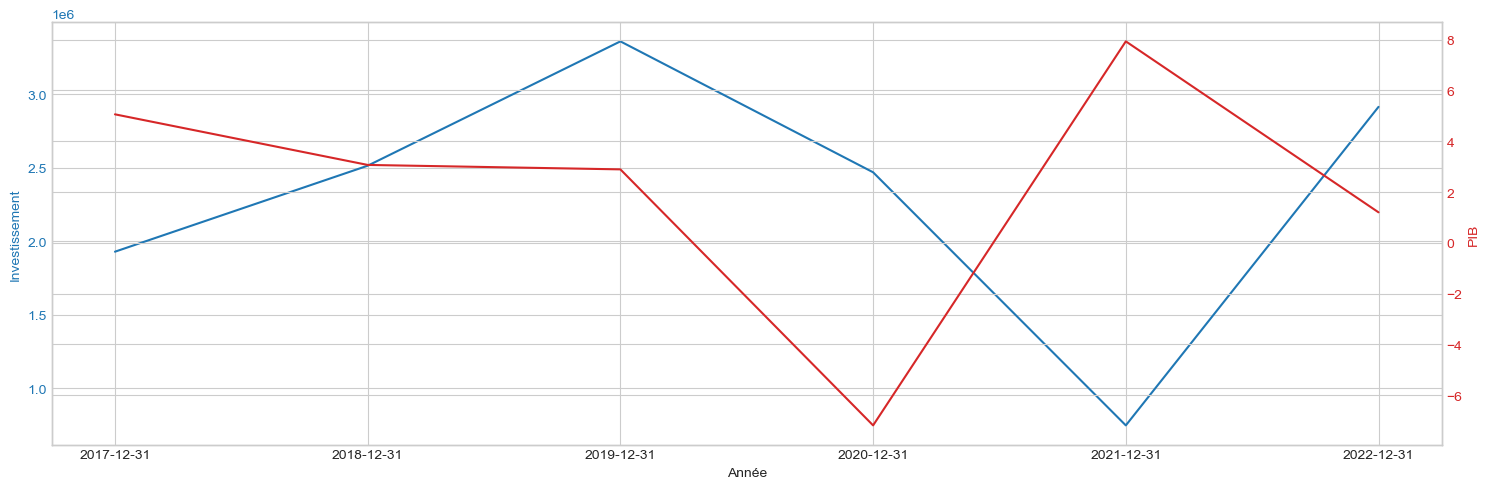

In [76]:
# Créer un graphique linéaire des investissements et PIB : 

fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('Année')
ax1.set_ylabel('Investissement', color=color)
ax1.plot(inv_pib['ANNEE'].astype(str), inv_pib['INVESTISSEMENT'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('PIB', color=color)
ax2.plot(inv_pib['ANNEE'].astype(str), inv_pib['PIB'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [162]:
X = inv_pib['PIB']
y = inv_pib['INVESTISSEMENT']

In [163]:
X = sm.add_constant(X)

In [164]:
model = sm.OLS(y, X).fit()

In [165]:
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         INVESTISSEMENT   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.217
Date:                Sat, 27 May 2023   Prob (F-statistic):              0.332
Time:                        16:12:15   Log-Likelihood:                -89.482
No. Observations:                   6   AIC:                             183.0
Df Residuals:                       4   BIC:                             182.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.506e+06      4e+05      6.271      0.003     1.4e+06    3.62e+06
PIB        -8.556e+04   7.75e+04     -1.103      0.332   -3.01e+05     1.3e+05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.105
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.328
Skew:                          -0.027   Prob(JB):                        0.849
Kurtosis:                       1.856   Cond. No.                         5.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
#EQUATION : 
INVESTISSEMENT =  2.506e+06 -8.556e+04*inv_pib['PIB'] #Regression Line

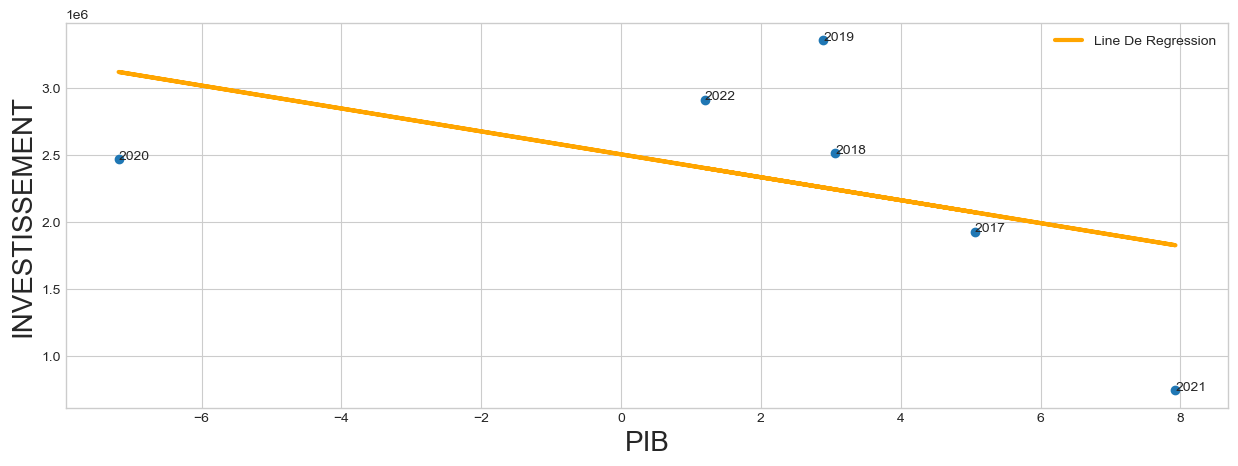

In [82]:
labels = ['2017','2018','2019','2020','2021','2022']
plt.figure(figsize=(15,5))
plt.scatter(inv_pib['PIB'],inv_pib['INVESTISSEMENT'])
for i, label in enumerate(labels):
    plt.annotate(label, (inv_pib.iloc[i]['PIB'], inv_pib.iloc[i]['INVESTISSEMENT']),fontsize=10)

fig = plt.plot(inv_pib['PIB'],INVESTISSEMENT,lw=3,c='orange',label='Line De Regression')

plt.legend()
plt.xlabel('PIB',fontsize=20)
plt.ylabel('INVESTISSEMENT',fontsize=20)
plt.show()

In [83]:
''' 
Resumer : 
    - Puis que R2 = 0.233 donc l'ajustement du medele est mauvise 
    - Et puis que (P>|t|)=0.332 >>> 0.05 donc la variable "PIB" n'a pas un effet significatif sur la variable INVESTISSEMENT.
'''

' \nResumer : \n    - Puis que R2 = 0.233 donc l\'ajustement du medele est mauvise \n    - Et puis que (P>|t|)=0.332 >>> 0.05 donc la variable "PIB" n\'a pas un effet significatif sur la variable INVESTISSEMENT.\n'

****************************************************************************************************************************************************

-> Analyse de Regression Linéaire Multiple : 

#Ajouter des factures A la variable COVID-19: 

In [84]:
budget_muat = pd.read_excel('Données_Supp/Budget_MUAT.xlsx')

In [85]:
budget_muat

,ANNEE,Budget General MUAT
0,2012-12-31\t,1592567000
1,2014-12-31\t,1563007000
2,2016-12-31\t,1864444000
3,2017-12-31\t,1817688000
4,2018-12-31\t,1912214000
5,2019-12-31\t,1944141000
6,2020-12-31\t,1967757000
7,2021-12-31\t,1576438000
8,2022-12-31\t,1759722000


In [86]:
budget_muat.columns = [c.replace(' ','_').upper() for c in budget_muat.columns]

In [87]:
budget_muat['ANNEE'] = pd.to_datetime(budget_muat['ANNEE'].str.replace('\t',''))

In [88]:
inv_et_covid_19_muat = pd.merge(inv_et_covid_19,budget_muat,on='ANNEE')

In [89]:
inv_et_covid_19_muat['BUDGET_GENERAL_MUAT'] = inv_et_covid_19_muat['BUDGET_GENERAL_MUAT'].astype(float)

In [90]:
inv_et_covid_19_muat

,ANNEE,INVESTISSEMENT,COVID-19,BUDGET_GENERAL_MUAT
0,2012-12-31,6018915.20,0,1.592567e+09
1,2014-12-31,3028316.26,0,1.563007e+09
2,2016-12-31,2990576.00,0,1.864444e+09
3,2017-12-31,1927951.60,0,1.817688e+09
4,2018-12-31,2512974.96,0,1.912214e+09
5,2019-12-31,3358883.60,0,1.944141e+09
6,2020-12-31,2468179.00,1,1.967757e+09
7,2021-12-31,746343.60,1,1.576438e+09
8,2022-12-31,2913370.00,0,1.759722e+09


#plot l'investissment et le budget general de MUAT (Ministère de l'Aménagement du territoire national, de l'Urbanisme, de l'Habitat et de la Politique de la ville)

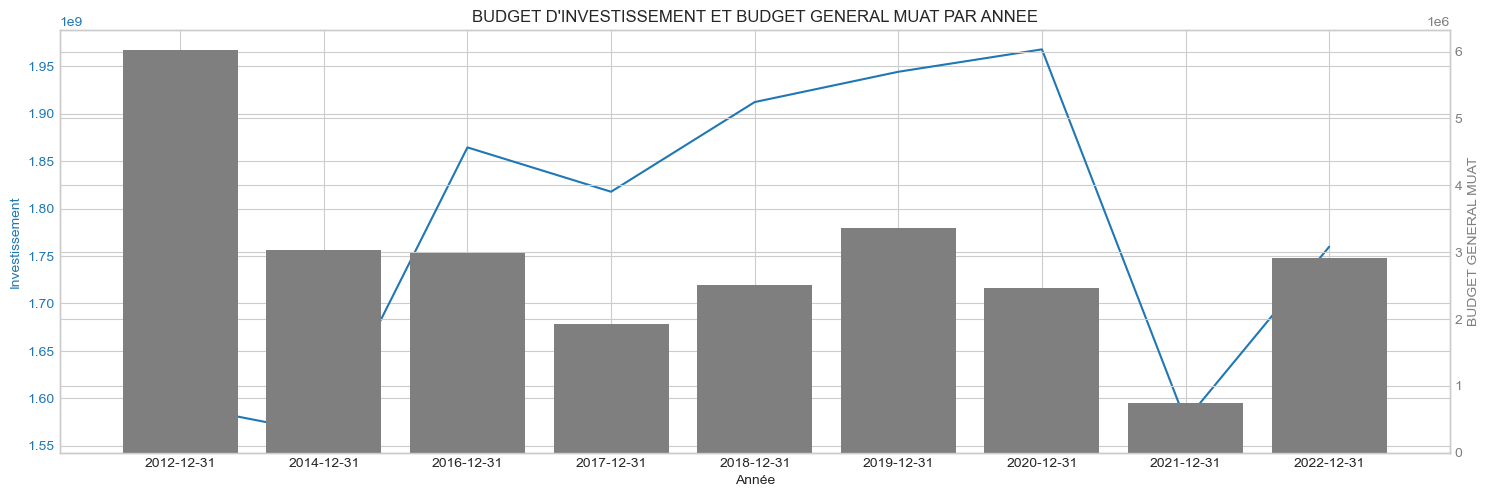

In [91]:
fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('Année')
ax1.set_ylabel('Investissement', color=color)
ax1.plot(inv_et_covid_19_muat['ANNEE'].astype(str), inv_et_covid_19_muat['BUDGET_GENERAL_MUAT'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:gray'
ax2.set_ylabel('BUDGET GENERAL MUAT', color=color)
ax2.bar(inv_et_covid_19_muat['ANNEE'].astype(str), inv_et_covid_19_muat['INVESTISSEMENT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

plt.title("BUDGET D'INVESTISSEMENT ET BUDGET GENERAL MUAT PAR ANNEE")
plt.show()

Analyse De Correlation : 

In [92]:
inv_et_covid_19_muat.corr()

,INVESTISSEMENT,COVID-19,BUDGET_GENERAL_MUAT
INVESTISSEMENT,1.000000,-0.514183,-0.141916
COVID-19,-0.514183,1.000000,-0.018990
BUDGET_GENERAL_MUAT,-0.141916,-0.018990,1.000000


Analyse De Regression Linéaire Multiple : 

In [93]:
X = inv_et_covid_19_muat[['COVID-19','BUDGET_GENERAL_MUAT']]
y = inv_et_covid_19_muat['INVESTISSEMENT']

In [94]:
X = sm.add_constant(X)

In [95]:
model = sm.OLS(y, X).fit()

In [96]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         INVESTISSEMENT   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.210
Date:                Sat, 27 May 2023   Prob (F-statistic):              0.362
Time:                        15:39:08   Log-Likelihood:                -138.14
No. Observations:                   9   AIC:                             282.3
Df Residuals:                       6   BIC:                             282.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.585e+06   5

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [97]:
"""  
    - R-carré (R-squared) : Le R-carré mesure la proportion de la variance totale de la variable dépendante qui peut être expliquée par le modèle.
    Dans ce cas, le R-carré est de 0.861, ce qui signifie que les variables indépendantes (COVID-19 et BUDGET_GENERAL_MUAT)
    expliquent conjointement 86.1 % de la variance de la variable dépendante
    - Statistique F (F-statistic) : La statistique F est utilisée pour tester l'adéquation globale du modèle. 
    Une valeur élevée de la statistique F indique que les variables indépendantes ont un effet significatif sur la variable dépendante.
    Dans ce cas, la statistique F est de 9.281 avec une probabilité associée de 0.0519.
    Cela suggère qu'il y a une certaine tendance vers la significativité statistique, 
    mais il n'y a pas suffisamment de preuves pour affirmer que le modèle est globalement significatif.
    --> le modèle semble fournir une explication raisonnable de la variance de la variable dépendante, 
    avec un R-carré élevé. Cependant, la statistique F ne fournit pas suffisamment de preuves pour conclure à une significativité globale du modèle.
    Il serait important de mener des tests supplémentaires et de prendre en compte 
    d'autres facteurs avant de tirer des conclusions définitives sur la relation entre les variables dans ce modèle.
    --> selon ces résultats, il semble que la variable COVID-19 a un effet significatif sur la variable dépendante, 
    tandis que la constante et la variable BUDGET_GENERAL_MUAT n'ont pas d'effets significatifs.
"""

"  \n    - R-carré (R-squared) : Le R-carré mesure la proportion de la variance totale de la variable dépendante qui peut être expliquée par le modèle.\n    Dans ce cas, le R-carré est de 0.861, ce qui signifie que les variables indépendantes (COVID-19 et BUDGET_GENERAL_MUAT)\n    expliquent conjointement 86.1 % de la variance de la variable dépendante\n    - Statistique F (F-statistic) : La statistique F est utilisée pour tester l'adéquation globale du modèle. \n    Une valeur élevée de la statistique F indique que les variables indépendantes ont un effet significatif sur la variable dépendante.\n    Dans ce cas, la statistique F est de 9.281 avec une probabilité associée de 0.0519.\n    Cela suggère qu'il y a une certaine tendance vers la significativité statistique, \n    mais il n'y a pas suffisamment de preuves pour affirmer que le modèle est globalement significatif.\n    --> le modèle semble fournir une explication raisonnable de la variance de la variable dépendante, \n    avec

In [98]:
#Plot Modele : 

#Ajouter d'autre Variable  : Ressources du budget de l’Etat 

In [99]:
inv_et_covid_19_muat

,ANNEE,INVESTISSEMENT,COVID-19,BUDGET_GENERAL_MUAT
0,2012-12-31,6018915.20,0,1.592567e+09
1,2014-12-31,3028316.26,0,1.563007e+09
2,2016-12-31,2990576.00,0,1.864444e+09
3,2017-12-31,1927951.60,0,1.817688e+09
4,2018-12-31,2512974.96,0,1.912214e+09
5,2019-12-31,3358883.60,0,1.944141e+09
6,2020-12-31,2468179.00,1,1.967757e+09
7,2021-12-31,746343.60,1,1.576438e+09
8,2022-12-31,2913370.00,0,1.759722e+09


In [100]:
total_resources = pd.read_excel('Données_Supp/Le montant total des ressources du budget de Etat.xlsx')

In [101]:
total_resources.columns  = [c.upper().replace(' ','_') for c in total_resources]

In [102]:
total_resources['ANNEE'] = pd.to_datetime(total_resources['ANNEE'].str.replace('\t',''))

In [103]:
total_resources['TOTAL_BUDGET_ETAT'] = total_resources['TOTAL_BUDGET_ETAT'].str.replace(' ','').astype('Int64')

In [104]:
total_resources

,ANNEE,TOTAL_BUDGET_ETAT
0,2012-12-31,346759698000
1,2014-12-31,335177260000
2,2016-12-31,388916976000
3,2017-12-31,373096286000
4,2018-12-31,389538210000
5,2019-12-31,417516600000
6,2020-12-31,446734175000
7,2021-12-31,432106102000
8,2022-12-31,461191336000


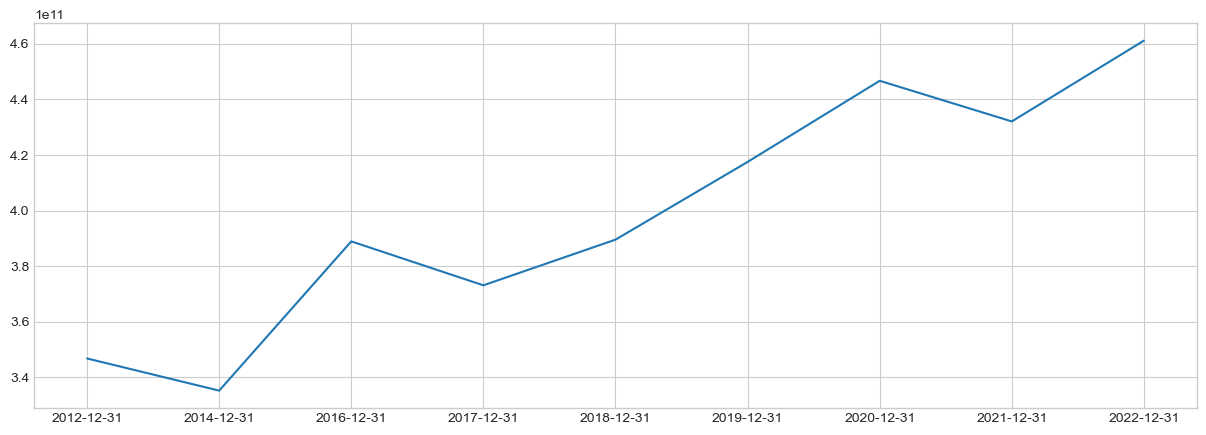

In [105]:
plt.figure(figsize=(15,5))
plt.plot(total_resources['ANNEE'].astype(str),total_resources['TOTAL_BUDGET_ETAT'])

In [106]:
#Join Data  :
inv_et_covid_19_muat_ressources = pd.merge(inv_et_covid_19_muat,total_resources,on='ANNEE')

In [107]:
inv_et_covid_19_muat_ressources.dtypes

ANNEE                  datetime64[ns]
INVESTISSEMENT                float64
COVID-19                        int32
BUDGET_GENERAL_MUAT           float64
TOTAL_BUDGET_ETAT               Int64
dtype: object

#Analyse de Correlation : 

In [108]:
inv_et_covid_19_muat_ressources.corr()

,INVESTISSEMENT,COVID-19,BUDGET_GENERAL_MUAT,TOTAL_BUDGET_ETAT
INVESTISSEMENT,1.000000,-0.514183,-0.141916,-0.458793
COVID-19,-0.514183,1.000000,-0.018990,0.524819
BUDGET_GENERAL_MUAT,-0.141916,-0.018990,1.000000,0.431765
TOTAL_BUDGET_ETAT,-0.458793,0.524819,0.431765,1.000000


In [109]:
inv_et_covid_19_muat_ressources[['COVID-19','BUDGET_GENERAL_MUAT','TOTAL_BUDGET_ETAT']] = inv_et_covid_19_muat_ressources[['COVID-19','BUDGET_GENERAL_MUAT','TOTAL_BUDGET_ETAT']].astype(float)

In [110]:
X = inv_et_covid_19_muat_ressources[['COVID-19','BUDGET_GENERAL_MUAT','TOTAL_BUDGET_ETAT']]
y = inv_et_covid_19_muat_ressources['INVESTISSEMENT']

In [111]:
X = sm.add_constant(X)

In [112]:
model = sm.OLS(y, X).fit()

In [113]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         INVESTISSEMENT   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                 -0.095
Method:                 Least Squares   F-statistic:                    0.7681
Date:                Sat, 27 May 2023   Prob (F-statistic):              0.559
Time:                        15:39:09   Log-Likelihood:                -137.96
No. Observations:                   9   AIC:                             283.9
Df Residuals:                       5   BIC:                             284.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.899e+06   6

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [114]:
inv_et_covid_19_muat_ressources

,ANNEE,INVESTISSEMENT,COVID-19,BUDGET_GENERAL_MUAT,TOTAL_BUDGET_ETAT
0,2012-12-31,6018915.20,0.0,1.592567e+09,3.467597e+11
1,2014-12-31,3028316.26,0.0,1.563007e+09,3.351773e+11
2,2016-12-31,2990576.00,0.0,1.864444e+09,3.889170e+11
3,2017-12-31,1927951.60,0.0,1.817688e+09,3.730963e+11
4,2018-12-31,2512974.96,0.0,1.912214e+09,3.895382e+11
5,2019-12-31,3358883.60,0.0,1.944141e+09,4.175166e+11
6,2020-12-31,2468179.00,1.0,1.967757e+09,4.467342e+11
7,2021-12-31,746343.60,1.0,1.576438e+09,4.321061e+11
8,2022-12-31,2913370.00,0.0,1.759722e+09,4.611913e+11


In [115]:
'''  
    selon les résultats de cette régression, la seule variable qui semble avoir une relation potentiellement 
    significative avec la chute de l'investissement en 2021 est COVID-19, bien que cette relation ne soit pas statistiquement significative à 
    un niveau de confiance de 95%. Les variables BUDGET_GENERAL_MUAT et TOTAL_BUDGET_ETAT ne semblent pas avoir une influence significative sur 
    l'investissement dans cette analyse
'''

"  \n    selon les résultats de cette régression, la seule variable qui semble avoir une relation potentiellement \n    significative avec la chute de l'investissement en 2021 est COVID-19, bien que cette relation ne soit pas statistiquement significative à \n    un niveau de confiance de 95%. Les variables BUDGET_GENERAL_MUAT et TOTAL_BUDGET_ETAT ne semblent pas avoir une influence significative sur \n    l'investissement dans cette analyse\n"

In [116]:
pib = pd.read_excel('Données_Supp/PIB_au_maroc.xlsx')

In [117]:
pib['ANNEE'] = pd.to_datetime(pib['ANNEE'].str.replace('\t',''))

In [118]:
inv_et_covid_19_muat_ressources_pib = pd.merge(inv_et_covid_19_muat_ressources,pib,on='ANNEE')

In [119]:
inv_et_covid_19_muat_ressources_pib

,ANNEE,INVESTISSEMENT,COVID-19,BUDGET_GENERAL_MUAT,TOTAL_BUDGET_ETAT,PIB
0,2012-12-31,6018915.20,0.0,1.592567e+09,3.467597e+11,3.010
1,2014-12-31,3028316.26,0.0,1.563007e+09,3.351773e+11,19.050
2,2016-12-31,2990576.00,0.0,1.864444e+09,3.889170e+11,0.520
3,2017-12-31,1927951.60,0.0,1.817688e+09,3.730963e+11,5.058
4,2018-12-31,2512974.96,0.0,1.912214e+09,3.895382e+11,3.066
5,2019-12-31,3358883.60,0.0,1.944141e+09,4.175166e+11,2.891
6,2020-12-31,2468179.00,1.0,1.967757e+09,4.467342e+11,-7.187
7,2021-12-31,746343.60,1.0,1.576438e+09,4.321061e+11,7.930
8,2022-12-31,2913370.00,0.0,1.759722e+09,4.611913e+11,1.200


Analyse de Correlation : 

In [120]:
inv_et_covid_19_muat_ressources_pib.corr()

,INVESTISSEMENT,COVID-19,BUDGET_GENERAL_MUAT,TOTAL_BUDGET_ETAT,PIB
INVESTISSEMENT,1.000000,-0.514183,-0.141916,-0.458793,-0.080245
COVID-19,-0.514183,1.000000,-0.018990,0.524819,-0.290010
BUDGET_GENERAL_MUAT,-0.141916,-0.018990,1.000000,0.431765,-0.711623
TOTAL_BUDGET_ETAT,-0.458793,0.524819,0.431765,1.000000,-0.610368
PIB,-0.080245,-0.290010,-0.711623,-0.610368,1.000000


In [121]:
X = inv_et_covid_19_muat_ressources_pib[['COVID-19','BUDGET_GENERAL_MUAT','TOTAL_BUDGET_ETAT','PIB']]
y = inv_et_covid_19_muat_ressources_pib['INVESTISSEMENT']

In [122]:
X = sm.add_constant(X)

In [123]:
model = sm.OLS(y,X).fit()

In [124]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         INVESTISSEMENT   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     2.261
Date:                Sat, 27 May 2023   Prob (F-statistic):              0.224
Time:                        15:39:10   Log-Likelihood:                -134.35
No. Observations:                   9   AIC:                             278.7
Df Residuals:                       4   BIC:                             279.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.072e+07   7

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [125]:
inv_et_covid_19_muat_ressources_pib

,ANNEE,INVESTISSEMENT,COVID-19,BUDGET_GENERAL_MUAT,TOTAL_BUDGET_ETAT,PIB
0,2012-12-31,6018915.20,0.0,1.592567e+09,3.467597e+11,3.010
1,2014-12-31,3028316.26,0.0,1.563007e+09,3.351773e+11,19.050
2,2016-12-31,2990576.00,0.0,1.864444e+09,3.889170e+11,0.520
3,2017-12-31,1927951.60,0.0,1.817688e+09,3.730963e+11,5.058
4,2018-12-31,2512974.96,0.0,1.912214e+09,3.895382e+11,3.066
5,2019-12-31,3358883.60,0.0,1.944141e+09,4.175166e+11,2.891
6,2020-12-31,2468179.00,1.0,1.967757e+09,4.467342e+11,-7.187
7,2021-12-31,746343.60,1.0,1.576438e+09,4.321061e+11,7.930
8,2022-12-31,2913370.00,0.0,1.759722e+09,4.611913e+11,1.200


In [126]:
taux_immobilier = pd.read_excel('Données_Supp/Contribution_du_secteur_immobilier.xlsx')

In [127]:
taux_immobilier['ANNEE'] = pd.to_datetime(taux_immobilier['ANNEE'].str.replace('\t',''))

<AxesSubplot:xlabel='ANNEE'>

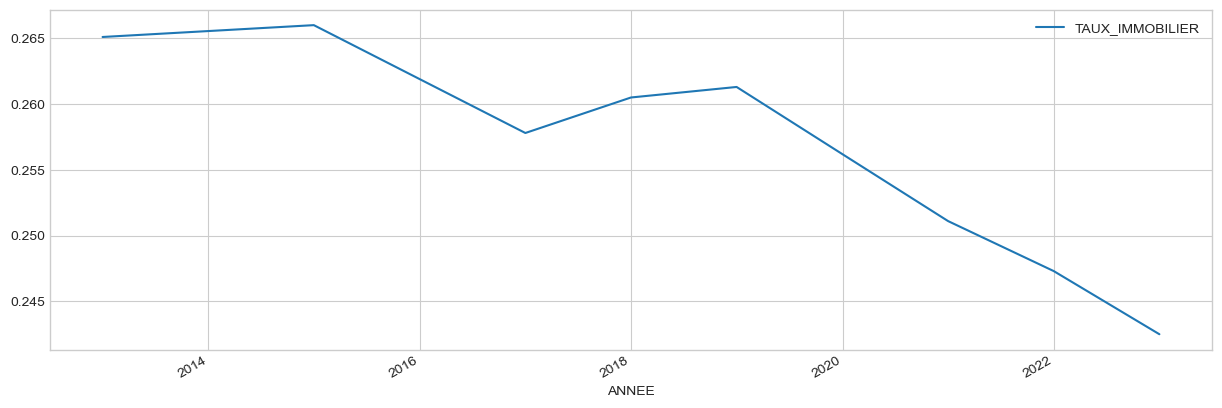

In [128]:
taux_immobilier.set_index('ANNEE').plot(figsize=(15,5))

In [129]:
inv_et_covid_19_muat_ressources_pib_immo = pd.merge(inv_et_covid_19_muat_ressources_pib,taux_immobilier,on='ANNEE')

In [130]:
inv_et_covid_19_muat_ressources_pib_immo

,ANNEE,INVESTISSEMENT,COVID-19,BUDGET_GENERAL_MUAT,TOTAL_BUDGET_ETAT,PIB,TAUX_IMMOBILIER
0,2012-12-31,6018915.20,0.0,1.592567e+09,3.467597e+11,3.010,0.2651
1,2014-12-31,3028316.26,0.0,1.563007e+09,3.351773e+11,19.050,0.2660
2,2016-12-31,2990576.00,0.0,1.864444e+09,3.889170e+11,0.520,0.2578
3,2017-12-31,1927951.60,0.0,1.817688e+09,3.730963e+11,5.058,0.2605
4,2018-12-31,2512974.96,0.0,1.912214e+09,3.895382e+11,3.066,0.2613
5,2019-12-31,3358883.60,0.0,1.944141e+09,4.175166e+11,2.891,0.2562
6,2020-12-31,2468179.00,1.0,1.967757e+09,4.467342e+11,-7.187,0.2511
7,2021-12-31,746343.60,1.0,1.576438e+09,4.321061e+11,7.930,0.2473
8,2022-12-31,2913370.00,0.0,1.759722e+09,4.611913e+11,1.200,0.2425


In [166]:
inv_et_covid_19_muat_ressources_pib_immo.describe()

,INVESTISSEMENT,COVID-19,BUDGET_GENERAL_MUAT,TOTAL_BUDGET_ETAT,PIB,TAUX_IMMOBILIER
count,9.000000e+00,9.000000,9.000000e+00,9.000000e+00,9.000000,9.000000
mean,2.885057e+06,0.222222,1.777553e+09,3.990041e+11,3.948667,0.256422
std,1.408919e+06,0.440959,1.628798e+08,4.366031e+10,6.993075,0.008022
min,7.463436e+05,0.000000,1.563007e+09,3.351773e+11,-7.187000,0.242500
25%,2.468179e+06,0.000000,1.592567e+09,3.730963e+11,1.200000,0.251100
50%,2.913370e+06,0.000000,1.817688e+09,3.895382e+11,3.010000,0.257800
75%,3.028316e+06,0.000000,1.912214e+09,4.321061e+11,5.058000,0.261300
max,6.018915e+06,1.000000,1.967757e+09,4.611913e+11,19.050000,0.266000


In [131]:
inv_et_covid_19_muat_ressources_pib_immo.corr()

,INVESTISSEMENT,COVID-19,BUDGET_GENERAL_MUAT,TOTAL_BUDGET_ETAT,PIB,TAUX_IMMOBILIER
INVESTISSEMENT,1.000000,-0.514183,-0.141916,-0.458793,-0.080245,0.489119
COVID-19,-0.514183,1.000000,-0.018990,0.524819,-0.290010,-0.510445
BUDGET_GENERAL_MUAT,-0.141916,-0.018990,1.000000,0.431765,-0.711623,-0.161337
TOTAL_BUDGET_ETAT,-0.458793,0.524819,0.431765,1.000000,-0.610368,-0.948059
PIB,-0.080245,-0.290010,-0.711623,-0.610368,1.000000,0.431038
TAUX_IMMOBILIER,0.489119,-0.510445,-0.161337,-0.948059,0.431038,1.000000


In [167]:
X = inv_et_covid_19_muat_ressources_pib_immo[['COVID-19','BUDGET_GENERAL_MUAT','TOTAL_BUDGET_ETAT','PIB','TAUX_IMMOBILIER']]
y = inv_et_covid_19_muat_ressources_pib_immo['INVESTISSEMENT']

In [168]:
X = sm.add_constant(X)

In [169]:
model = sm.OLS(y,X).fit()

In [171]:
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         INVESTISSEMENT   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     4.349
Date:                Sat, 27 May 2023   Prob (F-statistic):              0.128
Time:                        16:31:50   Log-Likelihood:                -130.17
No. Observations:                   9   AIC:                             272.3
Df Residuals:                       3   BIC:                             273.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.468e+08   7.84e+07     -1.872      0.158   -3.96e+08    1.03e+08
COVID-19            -2.715e+06   9.23e+05     -2.941      0.060   -5.65e+06    2.23e+05
BUDGET_GENERAL_MUAT    -0.0145      0.005     -2.963      0.059      -0.030       0.001
TOTAL_BUDGET_ETAT    9.701e-05   5.37e-05      1.807      0.168   -7.38e-05       0.000
PIB                 -2.036e+05   6.72e+04     -3.031      0.056   -4.17e+05    1.02e+04
TAUX_IMMOBILIER      5.392e+08   2.52e+08      2.142      0.122   -2.62e+08    1.34e+09
==============================================================================
Omnibus:                        1.363   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.506   Jarque-Bera (JB):                0.931
Skew:                          -0.676   Prob(JB):                        0.628
Kurtosis:                       2.189   Cond. No.                     3.96e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""